# Módulo 1 Construcción de un modelo estadístico base (Portafolio Implementación) 
## Diego Díaz Ayala 
## A01770236

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm


WE DOWNLOAD THE DATA FROM THE .CSV USING PANDAS

In [2]:
data = pd.read_csv("dataus2023.csv")
data.shape

firms = pd.read_csv("firmsus2023.csv")
firms.shape

(5615, 7)

In [3]:
firms.head(10)

,empresa,Nombre,status,partind,naics1,naics2,SectorEconomatica
0,A,"Agilent Technologies, Inc",activo,0.100,Industrias manufactureras,"Fabricación de instrumentos de medición, contr...",Electroelectronic
1,AA,Alcoa Corp,activo,NaN,Industrias manufactureras,Industria básica del aluminio,Siderur & Metalur
2,AABA_old,Altaba Inc,cancelado,NaN,"Servicios profesionales, científicos y técnicos",Servicios de diseño de sistemas de cómputo y s...,Software y Datos
3,AAC_old,Aac Hldg Inc,cancelado,NaN,Servicios de salud y de asistencia social,Otros consultorios para el cuidado de la salud,Otros
4,AAIC,Arlington Asset Investment Corp,activo,NaN,Servicios financieros y de seguros,Otros fondos,Fondos
5,AAL,American Airlines Group Inc,activo,0.028,"Transportes, correos y almacenamiento",Transporte aéreo regular,Transporte Servic
6,AAME,Atlantic American Corp,activo,NaN,Servicios financieros y de seguros,Instituciones de seguros,Finanzas y Seguros
7,AAOI,"Applied Optoelectronics, Inc",activo,NaN,Industrias manufactureras,Fabricación de componentes electrónicos,Electroelectronic
8,AAON,"Aaon, Inc",activo,NaN,Industrias manufactureras,"Fabricación de equipo de aire acondicionado, c...",Maquinaria Indust
9,AAP,"Advance Auto Parts, Inc",activo,0.011,Comercio al por menor,"Tienda de repuestos, accesorios y llantas",Comercio


WE USE THE Q OF EACH YEAR AS AN INDEX OF OUR DATAFRAME

In [4]:
data['qdate']= pd.PeriodIndex(data.q, freq='Q')
data.set_index(["firm","qdate"], inplace=True)

print(data.head(10))
#data.index

                  q  fiscalmonth     revenue       cogs       sgae  \
firm qdate                                                           
A    2000Q1  2000q1          NaN         NaN        NaN        NaN   
     2000Q2  2000q2          6.0   4731000.0  2421000.0  1925000.0   
     2000Q3  2000q3          9.0   7401000.0  3790000.0  3016000.0   
     2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.0   
     2001Q1  2001q1          3.0   2841000.0  1449000.0  1113000.0   
     2001Q2  2001q2          6.0   4930000.0  2683000.0  2025000.0   
     2001Q3  2001q3          9.0   6736000.0  3829000.0  3027000.0   
     2001Q4  2001q4         12.0   8396000.0  5166000.0  4008000.0   
     2002Q1  2002q1          3.0   1426000.0   878000.0   990000.0   
     2002Q2  2002q2          6.0   2883000.0  1732000.0  1942000.0   

             otherincome  extraordinaryitems  finexp  incometax  totalassets  \
firm qdate                                                                     

## 1.1 Calculation of financial variables and ratios

You have to create new variables (columns) in the dataset related to important financial variables and ratios:

In [5]:
firms.columns
firms1 = firms[["empresa", "Nombre", "status", "naics1"]]
firms1.columns = ['firm', 'Empresa', 'status', 'industria']
data = pd.merge(data, firms1, on="firm", how='left')

In [6]:
data['ry'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))
data['rq'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))

In [7]:
graf_ry = data['ry']
graf_ry = graf_ry.fillna(graf_ry.mean())

WE CALCULATE EACH OF THE FINANTIAL RATIOS THAT WERE ASKED FOR, THE INDICATION IS ALSO MADE FOR CASES IN WHICH THE VARIABLE ON WHICH THESE RATIOS DEPEND IS EQUAL TO 0, WHICH GIVES US A NAN VALUE

In [8]:
data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']
data['f1rq'] = data['rq'].shift(-1)
data['opm'] = np.where(data['revenue'] == 0, np.NaN, data['ebit'] / data['revenue'])
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']
data['pm'] = np.where(data['revenue'] == 0, np.NaN, data['netincome'] / data['revenue'])
data['ato'] = np.where(data['totalassets'] == 0, np.NaN, data['revenue'] / data['totalassets'])
data['acidratio'] = np.where(data['currentliabilities']==0,np.NaN,data['currentassets'] / data['currentliabilities'])
data['finlev'] = np.where(data['totalassets'] == 0, np.NaN, data['longdebt'] / data['totalassets'])
data['mvalue'] = data['originalprice'] * data['sharesoutstanding']
data['bookvalue'] = data['totalassets'] - data['totalliabilities']

## 1.2 Firm Composition of the US financial market

Considering the most recent financial quarter of the dataset:

* Show how many active firms by industry there are in the sample

* For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed? You have to do the right descriptive statistics

* Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

* Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?


### - Show how many active firms by industry there are in the sample.

HERE WE CAN SEE HOW MANY FIRMS BY INDUSTRY ARE CURRENTLY ACTIVE IN THE INDUSTRY

In [9]:
pd.options.display.float_format = '{:,.2f}'.format
active_2023q2 = data.loc[(data['status'] == "activo") & (data['q'] == "2023q2")]

a = active_2023q2[['industria', 'firm']].groupby('industria').count()
a.head(10)



,firm
industria,
-,2
"Agricultura, ganadería, aprovechamiento forestal, pesca y caza",17
Comercio al por mayor,79
Comercio al por menor,145
Construcción,46
"Empresas de electricidad, gas y agua",77
Industrias manufactureras,1540
Información en medios masivos,256
"Minería, explotación de canteras y extracción de petróleo y gas",113


In [10]:
industrysummary=active_2023q2.groupby('industria').agg(
{ 'firm':['count'],
 'mvalue':['min','max','median','std','mean'],'bookvalue':['min','max','median','std']}
)
industrysummary

firm       mvalue  \
                                                   count          min   
industria                                                               
-                                                      2 5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    17     3,687.58   
Comercio al por mayor                                 79     5,458.41   
Comercio al por menor                                145     3,795.68   
Construcción                                          46     2,212.28   
Empresas de electricidad, gas y agua                  77    33,728.24   
Industrias manufactureras                           1540       796.17   
Información en medios masivos                        256     3,256.72   
Minería, explotación de canteras y extracción d...   113        34.17   
Otros servicios excepto actividades gubernament...    17    16,742.10   
Servicios de alojamiento temporal y de preparac...    71     9,806.64   
Servicios de apoyo a los negocios y manejo de r...   128     2,802.16   
Servicios de esparcimiento culturales y deporti...    24     3,092.33   
Servicios de salud y de asistencia social             63       717.42   
Servicios educativos                                  13    83,986.36   
Servicios financieros y de seguros                   686     5,559.04   
Servicios inmobiliarios y de alquiler de bienes...    68     3,440.61   
Servicios profesionales, científicos y técnicos      137     3,638.32   
Transportes, correos y almacenamiento                 70    29,816.46   

                                                                     \
                                                                max   
industria                                                             
-                                                      5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    45,050,089.23   
Comercio al por mayor                                 57,645,136.00   
Comercio al por menor                              1,337,539,706.77   
Construcción                                          41,504,950.92   
Empresas de electricidad, gas y agua                 150,159,578.58   
Industrias manufactureras                          3,050,896,326.94   
Información en medios masivos                      2,532,080,938.79   
Minería, explotación de canteras y extracción d...    69,808,657.11   
Otros servicios excepto actividades gubernament...     9,764,061.13   
Servicios de alojamiento temporal y de preparac...   217,470,301.71   
Servicios de apoyo a los negocios y manejo de r...   444,875,318.55   
Servicios de esparcimiento culturales y deporti...   163,141,789.33   
Servicios de salud y de asistencia social             83,514,600.50   
Servicios educativos                                   3,171,234.18   
Servicios financieros y de seguros                   750,735,436.68   
Servicios inmobiliarios y de alquiler de bienes...   195,201,712.35   
Servicios profesionales, científicos y técnicos    1,519,830,900.00   
Transportes, correos y almacenamiento                153,955,377.34   

                                                                 \
                                                         median   
industria                                                         
-                                                  5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...   857,921.50   
Comercio al por mayor                              1,450,954.00   
Comercio al por menor                              1,662,158.77   
Construcción                                       2,559,768.80   
Empresas de electricidad, gas y agua               5,192,340.89   
Industrias manufactureras                            684,326.81   
Información en medios masivos                      2,370,194.81   
Minería, explotación de canteras y extracción d... 1,118,078.70   
Otros servicios excepto actividades gubernament... 1,073,749.25   
Servicios d

HERE WE CAN SEE THAT IN MOST INDUSTRIES IN TERMS OF BOOKVALUE AND MVALUE, WE CAN SEE THAT THE AVERAGE IS NOT A METRIC SINCE THERE ARE SOME COMPANIES THAT ARE AT A VERY HIGH END OF OUR SPECTRUM, WHICH UNLEVELS THE LA TOO MUCH DISTRIBUTION OF OUR VALUES, THE APPROPRIATE METRIC FOR THE MOST OF THESE CASES WOULD BE USING THE MEDIAN

IN THE CASE OF THE INDUSTRY THAT I HAVE TO ANALYZE WE CAN SEE THAT THE MIN IS AT 796000 FOR THE VALUES OF THE FIRM AS I MENTIONED ABOVE THE VALUES ARE VERY LOADED TOWARDS THE EXTREMES OF THE DATA THIS IS WHY THE AVERAGE IS NOT A GOOD MEASUREMENT TO ESTIMATE OR GIVE US AN IDEA OF WHAT THE TRENDS ARE IN THIS INDUSTRY

mvalue    14
dtype: int64

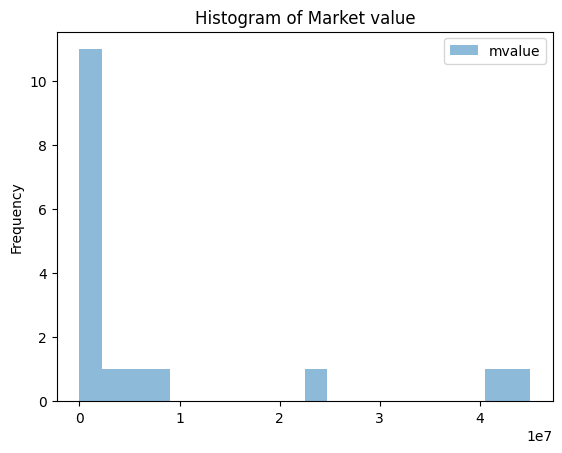

In [11]:
mvalue_agricultura = active_2023q2.loc[active_2023q2['industria'] == "Agricultura, ganadería, aprovechamiento forestal, pesca y caza"]
mvalue_agricultura = mvalue_agricultura[['mvalue']]
mvalue_agricultura.plot.hist(bins = 20, alpha = 0.5, title = "Histogram of Market value")
mvalue_agricultura = mvalue_agricultura[mvalue_agricultura['mvalue']<1e7]
mvalue_agricultura.count()

HERE WE CAN SEE THE LIST OF THE COMPANIES WITH THE MOST VALUE BY THEIR MARKET VALUE, WHAT WE CAN SEE IN THIS LIST IS THAT THERE IS A LOT OF DIVERSIFICATION SINCE IT INCLUDES DIFFERENT INDUSTRIES OF EACH TYPE, SUCH AS TECHNOLOGY, MANUFACTURING, FINANCIAL SERVICES, AND THE RETAIL TRADE

In [12]:
active_2023q2[['firm', 'mvalue','Empresa','industria']].sort_values(by='mvalue',ascending=False).head(10)


,firm,mvalue,Empresa,industria
1138,AAPL,"3,050,896,326.94",Apple Inc,Industrias manufactureras
316182,MSFT,"2,532,080,938.79",Microsoft Corp,Información en medios masivos
207232,GOOGL,"1,519,830,900.00",Alphabet Inc,"Servicios profesionales, científicos y técnicos"
28396,AMZN,"1,337,539,706.77","Amazon.Com, Inc",Comercio al por menor
338687,NVDA,"1,044,859,400.00",Nvidia Corp,Industrias manufactureras
478367,TSLA,"829,681,140.87","Tesla, Inc",Industrias manufactureras
72866,BRK_A,"750,735,436.68",Berkshire Hathaway Inc,Servicios financieros y de seguros
301173,META,"735,452,839.12","Meta Platforms, Inc","Servicios profesionales, científicos y técnicos"
489577,UNH,"447,491,234.90",Unitedhealth Group Inc,Servicios financieros y de seguros
280653,LLY,"445,190,020.12",Eli Lilly And Company,Industrias manufactureras


In [13]:
active_2023q2[['firm', 'bookvalue','Empresa','industria']].sort_values(by='bookvalue',ascending=False).head(10)

,firm,bookvalue,Empresa,industria
72866,BRK_A,"539,883,000.00",Berkshire Hathaway Inc,Servicios financieros y de seguros
259753,JPM,"312,516,000.00",Jpmorgan Chase & Co,Servicios financieros y de seguros
53286,BAC,"283,319,000.00",Bank Of America Corp,Servicios financieros y de seguros
207232,GOOGL,"267,141,000.00",Alphabet Inc,"Servicios profesionales, científicos y técnicos"
79421,C,"209,422,000.00",Citigroup Inc,Servicios financieros y de seguros
525961,XOM,"206,997,000.00",Exxon Mobil Corp,Industrias manufactureras
316182,MSFT,"206,223,000.00",Microsoft Corp,Información en medios masivos
513136,WFC,"181,952,000.00",Wells Fargo & Company,Servicios financieros y de seguros
28396,AMZN,"168,602,000.00","Amazon.Com, Inc",Comercio al por menor
127623,CVX,"159,298,000.00",Chevron Corp,Industrias manufactureras


## 1.3 Evolution of the US financial market

Considering the whole history of financial data for all firms, and only annual fiscal information (selecting fiscalmonth=12) :

- How the total market value of the US market has changed over the years? Do a table and/or graph and explain

- How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain


In [14]:
datay=data.loc[data['fiscalmonth']==12]
datay2=data[data['fiscalmonth']==12]
fmarket=datay[['year','mvalue','revenue','netincome']].groupby('year').sum()
fmarket

,mvalue,revenue,netincome
year,,,
2000,"12,814,978,634.15","6,650,301,475.86","344,723,426.83"
2001,"11,494,392,671.37","7,757,319,661.87","67,530,325.20"
2002,"9,494,723,157.61","7,575,463,606.79","-57,773,458.77"
2003,"11,675,951,523.21","8,213,607,184.22","364,552,095.88"
2004,"13,230,878,635.88","9,111,916,600.06","431,717,996.76"
2005,"13,789,108,526.52","9,975,745,857.16","522,880,104.83"
2006,"15,461,254,772.55","10,941,769,398.44","657,926,147.83"
2007,"16,149,130,338.06","11,603,740,650.63","610,497,891.61"
2008,"10,395,016,561.41","11,769,845,526.77","342,187,423.38"


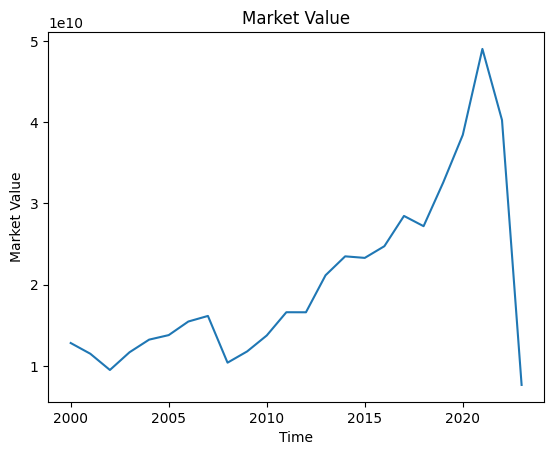

In [15]:
plt.plot(fmarket['mvalue']);
plt.title('Market Value');
plt.xlabel('Time');
plt.ylabel('Market Value');

WE CAN SEE THAT OVER TIME THE TOTAL VALUE OF THE MARKET HAS HAD ITS UPS AND DOWNS, THE MINIMUM POINT THAT IS SEEN IN THE LAST PARTS OF THIS GRAPH MAY BE DUE TO THE FACT THAT MANY OF THE LARGE COMPANIES HAVE NOT FINISHED THEIR FISCAL YEAR.

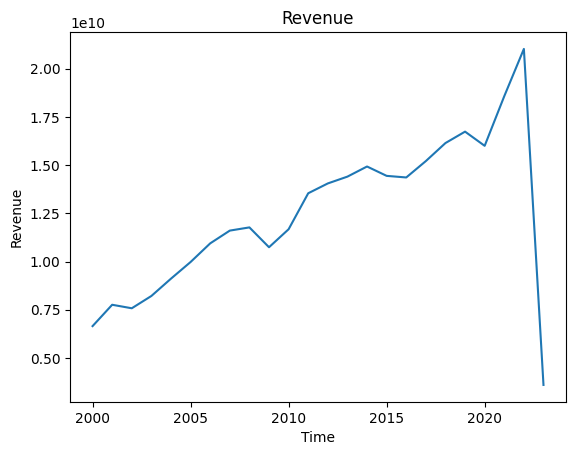

In [16]:
plt.plot(fmarket['revenue']);
plt.title('Revenue');
plt.xlabel('Time');
plt.ylabel('Revenue');

WE CAN SEE THAT IN THE REVENUE GRAPH A MORE UNIFORM GROWTH IS SEEN SINCE THIS VARIABLE SYMBOLIZES HOW MUCH MONEY THE COMPANY GENERATES WITHOUT DEDUCTING TAXES, SO IT IS A GROWTH THAT IS NOT SUBJECT TO OTHER VARIABLES AND CHANGES OTHER THAN THE ECONOMIC GROWTH OF THE COUNTRY.

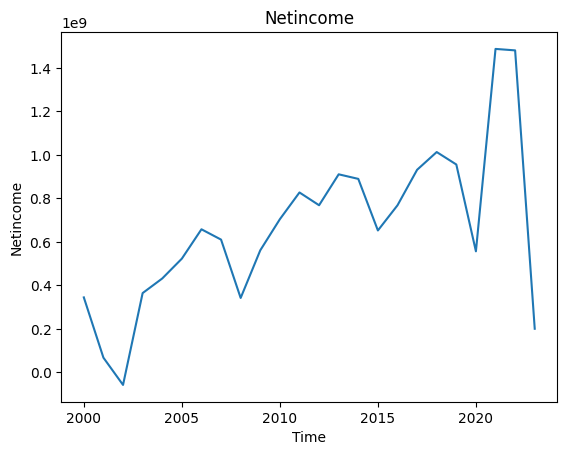

In [17]:
plt.plot(fmarket['netincome']);
plt.title('Netincome');
plt.xlabel('Time');
plt.ylabel('Netincome');

IN THE NETINCOME GRAPH YOU CAN SEE THAT IT IS IN A LOWER ORDER OF MAGNITUDE SINCE THIS VARIABLE DEFINES THE MONEY THAT COMPANIES HAVE GENERATED AFTER DEDUCTING TAXES AND OTHER THINGS, WE CAN ALSO SEE THAT THIS VARIABLE DOES NOT HAVE SUCH A UNIFORM GROWTH SINCE IT IS SUBJECT TO MORE CHANGES.

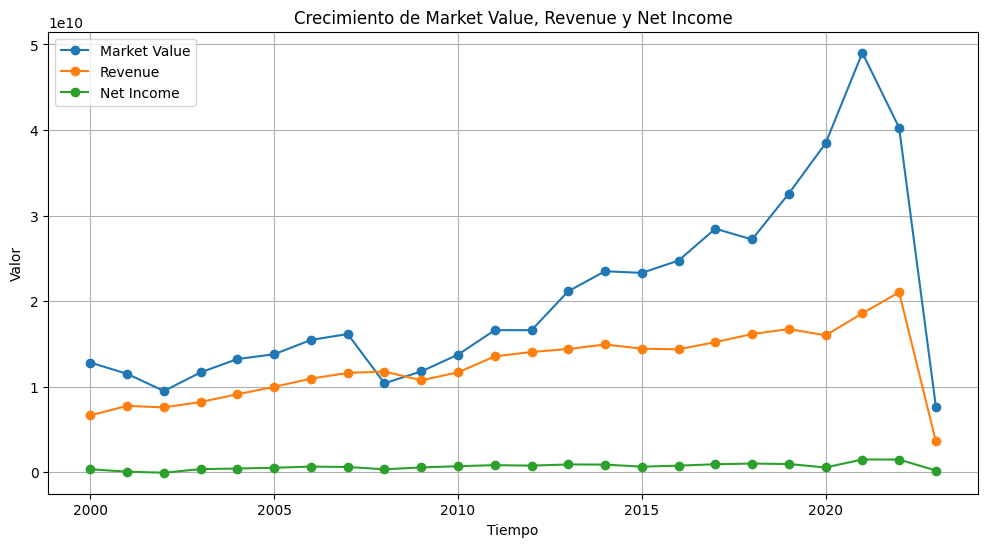

In [18]:
plt.figure(figsize=(12, 6))


plt.plot(fmarket.index, fmarket['mvalue'], label='Market Value', marker='o')
plt.plot(fmarket.index, fmarket['revenue'], label='Revenue', marker='o')
plt.plot(fmarket.index, fmarket['netincome'], label='Net Income', marker='o')


plt.title('Crecimiento de Market Value, Revenue y Net Income')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()  

plt.grid(True) 
plt.show()  

IN THIS GRAPH WE CAN INTERPRET AND DISTINGUISH MORE CLEARLY THAT THE VARIABLE THAT HAS GROWN THE MOST OVER TIME IS THE MARKET VALUE

## 1.4 Learing about one industry

Using the subsample of your industry and using annual fiscal information (selecting rows with fiscalmonth=12), and the most recent complete year (2022), do the following:

- Show descriptive statistics for future quarterly log return, annual return, total assets, revenue, netincome and all financial ratios calculated above. Provide a clear interpretation of the descriptive statistics of revenue and 1 financial ratio

Using annual fiscal data (selecting rows with fiscalmonth=12), and all years:

- Show a correlation matrix with the same variables you used for descriptive statistics above, but in the case of totalassets, revenue and netincome, use the logarithmic transformation of their values. Which variables have strongest and significant linear relationship with stock returns (annual and quarterly)? Explain

Select 2-3 variables and 2-3 ratios with the strongest correlation with future log quarterly returns and do the following:

- Do histograms for each factor/variables and interpret them

- Do plots to visualize the possible relationship each factor might have with quarterly returns (the dependent variable).

- Design and run a first version of a multiple regression model to examine whether your selected factors can explain/predict quarterly stock returns.

- You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

- (optional) For each independent variable (variable/ratio) check if winsorization is needed according to very extreme values. You can check this with the histograms of each variable/ratio. If it is necessary do the corresponding adjustments with winsorization to avoid unreliable results in your regression model

- Once you corrected your variables/ratios with winsorization (in case you did it) and addressed possible multicollienarity problems, run a final multiple regression model

Interpret your model

- Interpret with your own words the results of each coefficient (beta and their statistical significance)

- Interpret the R-squared of the model

- Write a conclusion of your results


In [19]:
dataser2022 = data.loc[(data['industria'] == "Industrias manufactureras") & (data['fiscalmonth']==12) & (data['status']=='activo') & (data['year']==2022)]
dataser1 = dataser2022[['firm','rq','ry','revenue','netincome','mvalue','bookvalue','opm','pm','ato','finlev','acidratio']]
dataser1.describe()

,rq,ry,revenue,netincome,mvalue,bookvalue,opm,pm,ato,finlev,acidratio
count,"1,447.00","1,416.00","1,472.00","1,469.00","1,453.00","1,472.00","1,252.00","1,252.00","1,472.00","1,472.00","1,469.00"
mean,-0.08,-0.56,"4,792,062.03","510,356.30","11,463,216.11","2,474,280.71",-18.03,-18.12,0.61,0.21,5.03
std,0.41,0.78,"21,497,252.45","3,622,327.89","70,614,774.38","10,206,152.98",153.31,154.86,0.66,0.24,6.39
min,-2.57,-4.45,-418.00,"-6,752,000.00","1,845.47","-15,848,000.00","-3,895.75","-3,857.75",-0.01,0.00,0.02
25%,-0.25,-0.93,"8,607.00","-60,806.00","84,561.57","45,494.25",-0.90,-0.91,0.08,0.03,1.72
50%,-0.03,-0.38,"252,604.55","-8,224.13","661,215.26","256,642.00",0.02,0.01,0.54,0.15,2.73
75%,0.15,-0.04,"2,082,658.50","127,672.00","3,382,234.75","1,040,550.00",0.12,0.09,0.91,0.31,5.66
max,2.66,1.39,"413,680,000.00","99,803,000.00","2,220,977,926.40","202,473,000.00",134.87,128.40,13.56,2.76,67.02


HERE THE VARIABLES THAT WE CAN HIGHLIGHT WOULD BE REVENUE, WHICH HAS AN AVERAGE VALUE OF AROUND 4792124 WHICH SUGGESTS US THAT COMPANIES IN THIS INDUSTRY ARE GENERATING INCOME CLOSE TO THIS VALUE, BUT AS WE SAW PREVIOUSLY THIS SHOULD NOT BE LIKE THIS, SINCE MEDIAN IS MOST OPTIMAL VALUE TO ESTIMATE WHERE THE TREND IS, WE CAN ALSO SEE THAT REVENUE IS THE ONE WITH THE HIGHEST STANDARD DEVIATION, WHICH INDICATES TO US THAT IT IS THE ONE WITH THE MOST VARIABILITY IN ITS DATA, OPM AND PM ALSO HAVE SOME STANDARD DEVIATIONS HIGHLY, IN CONCLUSION THIS ANALYSIS SHOWS US A GENERAL VIEW OF THE CHARACTERISTICS AND VARAIBILITY OF THE VARIABLES IN MY DATA SET

In [20]:
datasery = dataser2022[dataser2022['fiscalmonth'] == 12]
datasery[['fiscalmonth', 'revenue']].head()
datasery[['revenue', 'pm']].describe()

,revenue,pm
count,"1,472.00","1,252.00"
mean,"4,792,062.03",-18.12
std,"21,497,252.45",154.86
min,-418.00,"-3,857.75"
25%,"8,607.00",-0.91
50%,"252,604.55",0.01
75%,"2,082,658.50",0.09
max,"413,680,000.00",128.40


In [21]:
# Calculo logaritmico de las variables financieras
dataser = datasery.copy()
dataser['logta'] = np.where(dataser['totalassets']==0,np.NaN,np.log(dataser['totalassets']))
dataser['logre'] = np.where(dataser['revenue']==0,np.NaN,np.log(dataser['revenue']))
dataser['lognet'] = np.where(dataser['netincome']==0,np.NaN,np.log(dataser['netincome']))
dataser['logato'] = np.where(dataser['ato']==0,np.NaN,np.log(dataser['ato']))

C:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, 

In [22]:

columns = ['logta','logre','lognet','mvalue','bookvalue','opm','pm','ato','finlev','acidratio','f1rq','ry']
correlation_matrix = dataser[columns].corr()

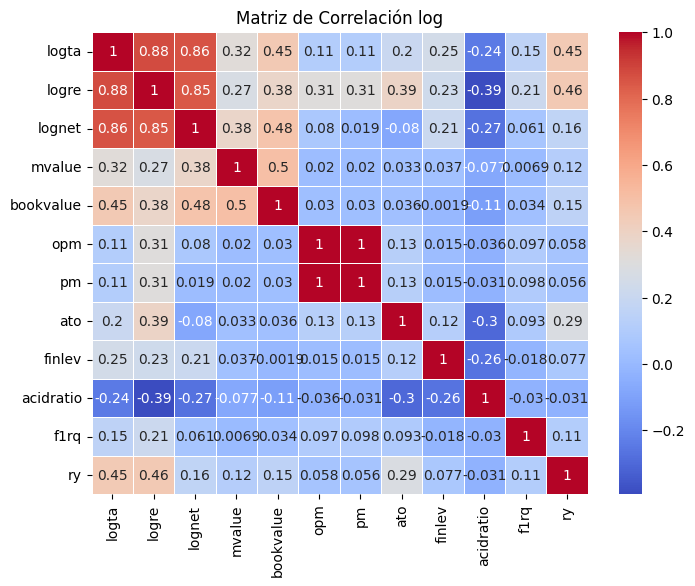

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación log')
plt.show()

THE VARIABLES WITH WHICH THEY HAVE THE GREATEST RELATIONSHIP WOULD BE TOTAL ASSETS, AND INCOME, THIS IS PROBABLY BECAUSE THE PROFITS OF A COMPANY ARE VERY RELATED TO ITS VALUE IN THE MARKET IN THE SAME WAY THE INCOME IT GENERATES.
WITH THE OTHER VARIABLES THE RELATIONSHIP THAT WE FOUND WITH THE QUARTERLY RETURNS IS PRETTY LOW EVEN THOUGH THAT DOES NOT MEAN THEY ARE NOT RELEVANT



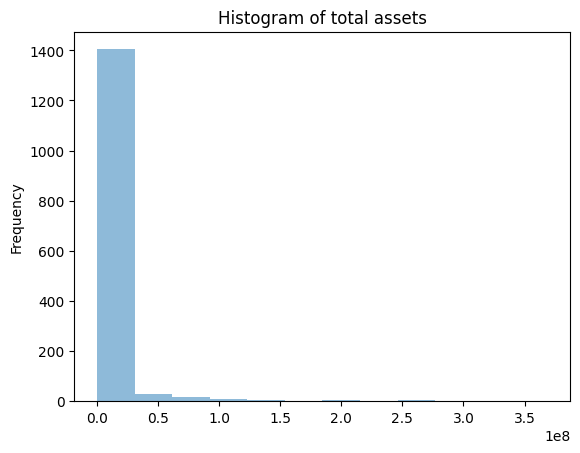

In [24]:
hist=dataser['totalassets'].plot.hist(bins=12,alpha=0.5,title="Histogram of total assets")

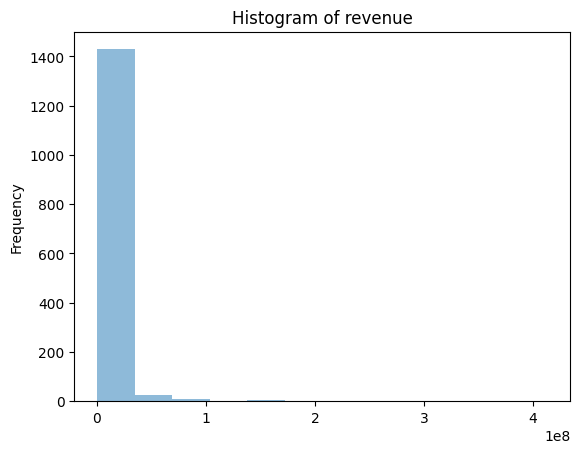

In [25]:
hist=dataser['revenue'].plot.hist(bins=12,alpha=0.5,title="Histogram of revenue")

WE CAN SEE THAT THE DISTRIBUTION OF THE HISTOGRAMS OF THE VARIABLES THAT HAD THE MOST CORRELATION WITH THE RETURN HAS A SIMILAR DISTRIBUTION

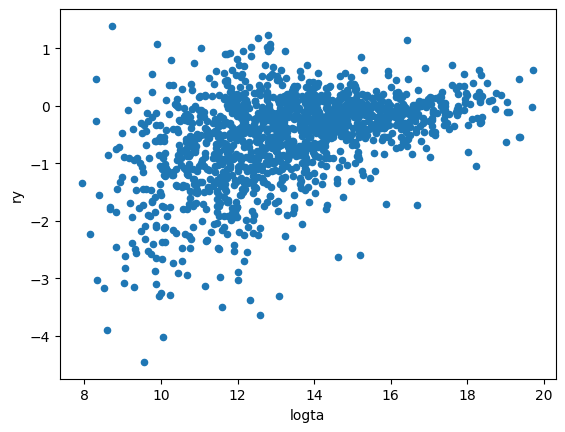

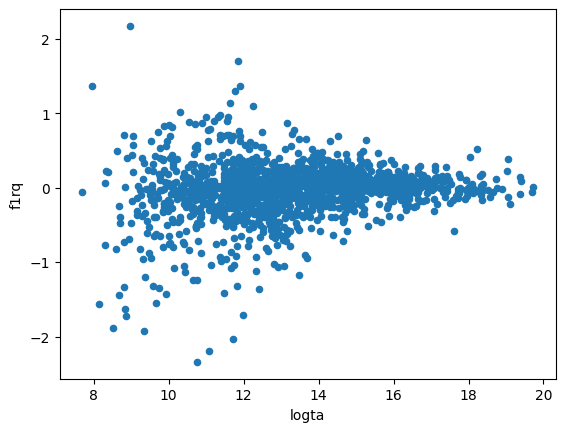

In [26]:
dataser[['logta','ry']].plot.scatter(x = 'logta', y= 'ry');
dataser[['logta','f1rq']].plot.scatter(x = 'logta', y= 'f1rq');


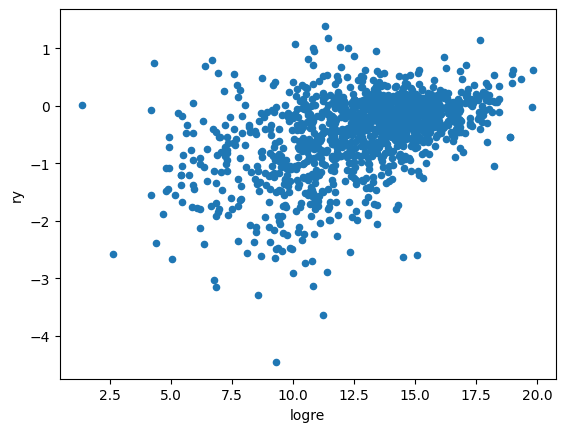

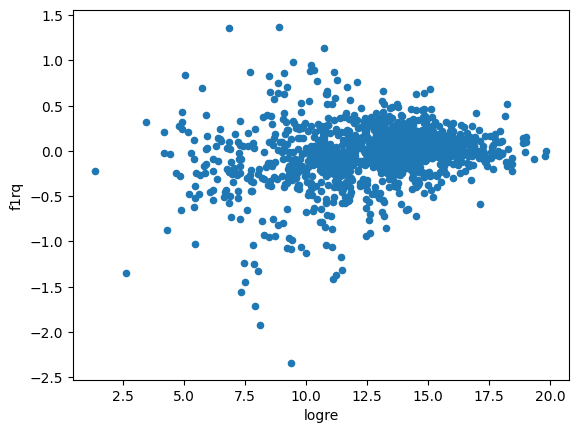

In [27]:
dataser[['logre','ry']].plot.scatter(x = 'logre', y= 'ry');
dataser[['logre','f1rq']].plot.scatter(x = 'logre', y= 'f1rq');


IT COULD BE INTERPRETED THAT THE RELATIONSHIP WITH WHICH OUR VARIABLES GROW (ACHIVER, LOGTA) WITH RESPECT TO OUR QUARTERLY RETURNS ARE LINEAR, OR LOGARITHMIC IN CASE THE DISPERSION OF THE VALUES IS VERY HIGH AS WE COULD SEE IN THE CORRELATION MATRIX

In [28]:
dataser['f1rq'].interpolate(method = 'linear', inplace = True)

X = dataser[['logre', 'logta', 'opm', 'pm']]

X = sm.add_constant(X)
Y = dataser['f1rq']

mkmodel = sm.OLS(Y, X, missing='drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1rq   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     15.78
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           1.33e-12
Time:                        23:32:54   Log-Likelihood:                -359.04
No. Observations:                1251   AIC:                             728.1
Df Residuals:                    1246   BIC:                             753.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2604      0.061     -4.288      0.0

WE CAN SEE THAT NONE OF THE COEFFICIENTS PASS THE VALUE OF P SO NONE WOULD BE SIGNIFICANT, ACHIEVE HAS THE ONLY COEFFICIENT THAT AT THE TIME THIS VARIABLE GROWS, OUR RETURN HAS A PROBABILITY OF GROWING 0.0299 WHEN IT ACHIEVES IT GROWS BY ONE UNIT

MULTICOLINEARITY IS A PHENOMENON THAT OCCURS WHEN TWO OR MORE VARIABLES OF OUR MODEL ARE VERY RELATED, WHICH CAN TOO MUCH AFFECT THEIR PREDICTIONS. I BELIEVE THIS HAPPENED SINCE SOME OF THE FINANCIAL RADIOS I USE ARE RELATIONS OF THE VARIABLES NORMAL.

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

V = X.copy()

V.fillna(V.mean(), inplace = True)

vif = pd.DataFrame()
vif["Variable"] = V.columns
vif["VIF"] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]

print(vif)

  Variable    VIF
0    const  35.78
1    logre   3.18
2    logta   2.90
3      opm 211.49
4       pm 211.18


TO ANALYZE THE COLLINEARITY OF OUR MODEL WE USE THE VIF FACTOR, THIS TELLS US IF TWO VARIABLES ARE STRONGLY RELATED. IF THIS FACTOR EXCEEDS 5 FOR ANY OF THE VARIABLES, IT MEANS THAT THERE IS A LOT OF COLLINEARITY, IN THIS CASE WE CAN SEE THAT OPM AND PM EXCEED THIS VALUE SO THIS SHOWS THATH THE COLLINEARITY IS TOO MUCH

### 2 MODEL

In [30]:
dataser['f1rq'].interpolate(method = 'linear', inplace = True)

X = dataser[['logre', 'logta', 'opm', 'ato']]

X = sm.add_constant(X)
Y = dataser['f1rq']

mkmodel = sm.OLS(Y, X, missing='drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1rq   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     15.75
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           1.40e-12
Time:                        23:32:54   Log-Likelihood:                -359.09
No. Observations:                1251   AIC:                             728.2
Df Residuals:                    1246   BIC:                             753.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2651      0.067     -3.963      0.0

HERE WE CAN SEE THAT AGAIN THAT THE ONLY COEFFICIENT THAT IS SIGNIFICANT IS THE REVENUE, AND LIKE THE PREVIOUS ONE WHEN THIS GROWS BY ONE UNIT OUR RETURN HAS A PROBABILITY OF GROWTH OF 2% IN OTHER CASES THE SAME CAN BE INTERPETED IN RELATION TO ITS COEFFICIENT, HOWEVER THESE DO NOT EXCEED ITS P-VALUE

### Conclusion.

IN THIS MODEL WE CAN SEE THAT IF WE SEE WHICH COEFFICIENTS EXCEED THE P VALUES, ONLY ACHIEVEMENT WOULD BE A SIGNIFICANT VARIABLE FOR F1RQ, AND NONE OF THE OTHER VARIABLES WOULD COUNT AS SIGNIFICANT FOR THE RELATION AND THEY WOULD NOT EXCEED ITS PVALUE, IN REGARD TO R -SQUARED TELLS US THAT IT HAS A VARIABILITY OF 3.5% THAT COULD BE REPRESENTED WITH THE CURRENT MODEL, SO IN CONCLUSION THE VARIABLES BEING CONSIDERED ARE NOT SUITABLE FOR ANALYSIS OR PREDICTIONS OF F1RQ

# Bloque 2. 

## Módulo 5 Preprocesamiento de datos multivariados o de una serie temporal

### 1.1 Descriptive statics

Calculate the weighted average of the ratios.

For the ratios, instead of calculating the arithmetic mean of the ratios, calculate the weighted average of the ratios. To calculate the weighted average of a ratio, you have to divide the sum of the numerator variable by the sum of the denominator variable. For example, to calculate the weighted average of profit margin you first sum all the net income of all firms and then divide it by the sum of revenue of all firms.

In [31]:
datasery.columns

datasery['wa_ebit'] = datasery['revenue'].sum() - datasery['cogs'].sum() - datasery['sgae'].sum()
datasery['wa_opm'] = np.where(datasery['revenue'].sum() == 0, np.NaN, datasery['ebit'].sum() / datasery['revenue'].sum())
datasery['wa_netincome'] = datasery['ebit'].sum() + datasery['otherincome'].sum() + datasery['extraordinaryitems'].sum() - datasery['finexp'].sum() - datasery['incometax'].sum()
datasery['wa_pm'] = np.where(datasery['revenue'].sum() == 0, np.NaN, datasery['netincome'].sum() / datasery['revenue'].sum())
datasery['wa_ato'] = np.where(datasery['totalassets'].sum() == 0, np.NaN, datasery['revenue'].sum() / datasery['totalassets'].sum())
datasery['wa_acidratio'] = np.where(datasery['currentliabilities'].sum()==0,np.NaN,datasery['currentassets'].sum() / datasery['currentliabilities'].sum())
datasery['wa_finlev'] = np.where(datasery['totalassets'].sum() == 0, np.NaN, datasery['longdebt'].sum() / datasery['totalassets'].sum())
datasery['wa_mvalue'] = datasery['originalprice'].sum() * datasery['sharesoutstanding'].sum()
datasery['wa_bookvalue'] = datasery['totalassets'].sum() - datasery['totalliabilities'].sum()

In [32]:
ratios = ['ebit','opm','netincome','pm','ato','acidratio','finlev','mvalue','bookvalue']
wa = ['wa_ebit','wa_opm','wa_netincome','wa_pm','wa_ato','wa_acidratio','wa_finlev','wa_mvalue','wa_bookvalue']
datasery[['pm','wa_pm','ato','wa_ato']].describe()

,pm,wa_pm,ato,wa_ato
count,"1,252.00","1,472.00","1,472.00","1,472.00"
mean,-18.12,0.11,0.61,0.74
std,154.86,0.00,0.66,0.00
min,"-3,857.75",0.11,-0.01,0.74
25%,-0.91,0.11,0.08,0.74
50%,0.01,0.11,0.54,0.74
75%,0.09,0.11,0.91,0.74
max,128.40,0.11,13.56,0.74


Interpret the weighted average of profit margin and asset turn over of your industry.

The weighted average of profit margin is 11%, this means that for every unit that the revenue increments the industry is making a profit margin of 11.

And for every every unit that the revenue increments, the total assets gives us 74.

## 1.2 Multiple Regression - advanced topics
### 1.2.1 Calculation of Variables

For the complete historical dataset of annual fiscal years (fiscalmonth=12 for all quarter-years), you have to calculate the following new independent variables:

    Firm size as a categorical variable. For each quarter, you have to label firms in 3 equal groups: small, medium, big according to the market value of the firms.

    Calculate the corresponding dummy (binary) variables for the firm size following the dummy encoding method.

    Calculate operating earnings per share deflated by stock price: oepsp = (ebit / sharesoutstanding) / originalprice

    Calculate earnings per share deflated by stock price: epsp = (netincome / sharesoutstanding) / originalprice

    Calculate book-to-market ratio: bmr = bookvalue / marketvalue

In this model, the variable you have to use as dependent variable will be annual stock returns (instead of quarterly returns) one quarter in the future (f1.ry).


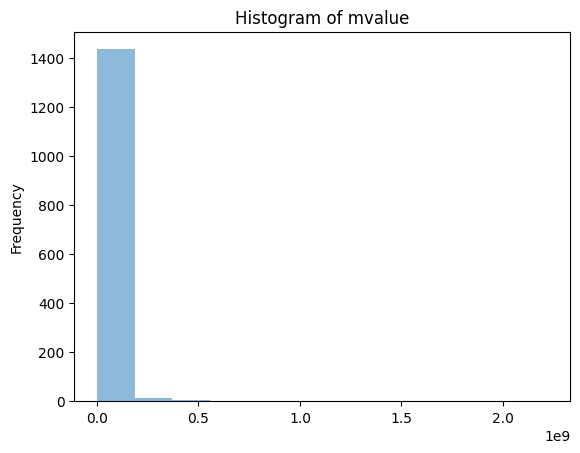

In [33]:
hist=datasery['mvalue'].plot.hist(bins=12,alpha=0.5,title="Histogram of mvalue")

In [34]:
datasery['mvalue'].describe()

count           1,453.00
mean       11,463,216.11
std        70,614,774.38
min             1,845.47
25%            84,561.57
50%           661,215.26
75%         3,382,234.75
max     2,220,977,926.40
Name: mvalue, dtype: float64

In [35]:
min = datasery['mvalue'].min()
max = datasery['mvalue'].max()

dataproof = datasery.copy()
dataproof['fsize'] = np.where(datasery['mvalue'] > ((max-min)/3)*2+min, 3, np.where(datasery['mvalue'] > ((max-min)/3)+min, 2, 1))


In [36]:
dummies = pd.get_dummies(dataproof['fsize'])
dataproof = pd.concat([dataproof, dummies], axis=1)

In [37]:
dataproof.columns

Index([              'firm',                  'q',        'fiscalmonth',
                  'revenue',               'cogs',               'sgae',
              'otherincome', 'extraordinaryitems',             'finexp',
                'incometax',        'totalassets',      'currentassets',
                'inventory',   'totalliabilities', 'currentliabilities',
                 'longdebt',           'adjprice',      'originalprice',
        'sharesoutstanding',               'year',        'fixedassets',
                    'yearf',            'Empresa',             'status',
                'industria',                 'ry',                 'rq',
                     'ebit',               'f1rq',                'opm',
                'netincome',                 'pm',                'ato',
                'acidratio',             'finlev',             'mvalue',
                'bookvalue',            'wa_ebit',             'wa_opm',
             'wa_netincome',              'wa_pm', 

In [41]:
dataproof['oepsp'] = (dataproof['ebit'] / dataproof['sharesoutstanding'])/dataproof['originalprice']
dataproof['epsp'] = (dataproof['netincome'] / dataproof['sharesoutstanding'])/dataproof['originalprice']
dataproof['bmr'] = (dataproof['bookvalue'] / dataproof['mvalue'])


### Winzoritation

We check the histograms to determine the limits of each ratio.

profit margin, asset turn over, oepsp, bmr.

count    1,252.00
mean       -18.12
std        154.86
min     -3,857.75
25%         -0.91
50%          0.01
75%          0.09
max        128.40
Name: pm, dtype: float64

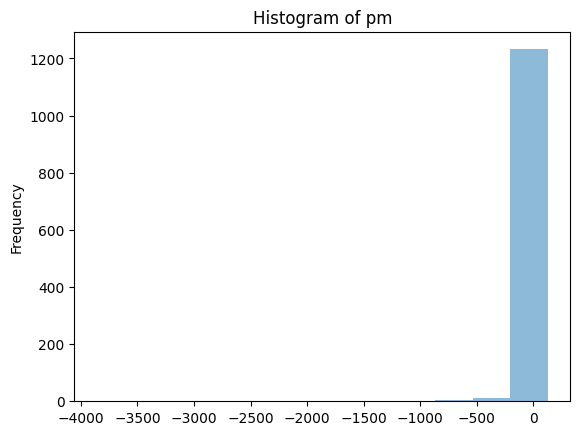

In [43]:
hist=datasery['pm'].plot.hist(bins=12,alpha=0.5,title="Histogram of pm")
datasery['pm'].describe()

We will take out the first data because there are extreme values on the left side of the histogram

In [45]:

lower_limit = dataproof['pm'].quantile(0.05)
upper_limit = dataproof['pm'].quantile(1)

dataproof['pm'] = np.where(dataproof['pm'] < lower_limit, lower_limit, dataproof['pm'])
dataproof['pm'] = np.where(dataproof['pm'] > upper_limit, upper_limit, dataproof['pm'])

count   1,472.00
mean        0.61
std         0.66
min        -0.01
25%         0.08
50%         0.54
75%         0.91
max        13.56
Name: ato, dtype: float64

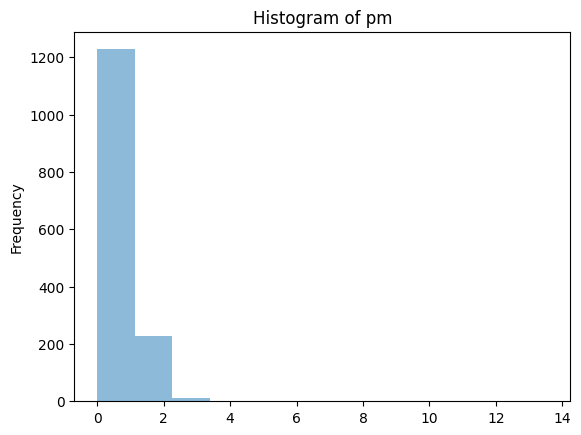

In [46]:
hist=datasery['ato'].plot.hist(bins=12,alpha=0.5,title="Histogram of ato")
datasery['ato'].describe()

In [47]:
lower_limit = dataproof['ato'].quantile(0)
upper_limit = dataproof['ato'].quantile(0.98)

dataproof['ato'] = np.where(dataproof['ato'] < lower_limit, lower_limit, dataproof['ato'])
dataproof['ato'] = np.where(dataproof['ato'] > upper_limit, upper_limit, dataproof['ato'])

count   1,450.00
mean       -0.45
std         1.48
min       -28.61
25%        -0.35
50%        -0.03
75%         0.07
max         0.86
Name: oepsp, dtype: float64

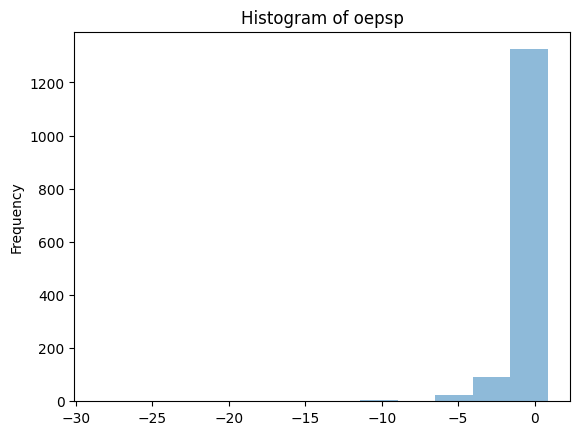

In [49]:
hist=dataproof['oepsp'].plot.hist(bins=12,alpha=0.5,title="Histogram of oepsp")
dataproof['oepsp'].describe()

In [51]:
lower_limit = dataproof['oepsp'].quantile(0.05)
upper_limit = dataproof['oepsp'].quantile(0.98)

dataproof['oepsp'] = np.where(dataproof['oepsp'] < lower_limit, lower_limit, dataproof['oepsp'])
dataproof['oepsp'] = np.where(dataproof['oepsp'] > upper_limit, upper_limit, dataproof['oepsp'])

count   1,453.00
mean        0.65
std         0.89
min        -3.82
25%         0.21
50%         0.45
75%         0.84
max         9.24
Name: bmr, dtype: float64

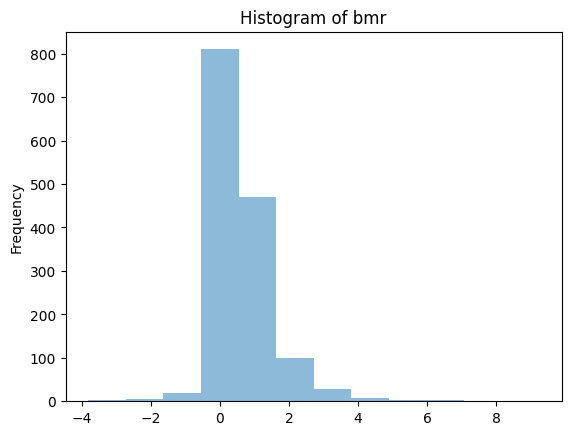

In [52]:
hist=dataproof['bmr'].plot.hist(bins=12,alpha=0.5,title="Histogram of bmr")
dataproof['bmr'].describe()

In [53]:
lower_limit = dataproof['bmr'].quantile(0.05)
upper_limit = dataproof['bmr'].quantile(0.98)

dataproof['bmr'] = np.where(dataproof['bmr'] < lower_limit, lower_limit, dataproof['bmr'])
dataproof['bmr'] = np.where(dataproof['bmr'] > upper_limit, upper_limit, dataproof['bmr'])

count   1,453.00
mean        0.67
std         0.71
min        -0.05
25%         0.21
50%         0.45
75%         0.84
max         3.34
Name: bmr, dtype: float64

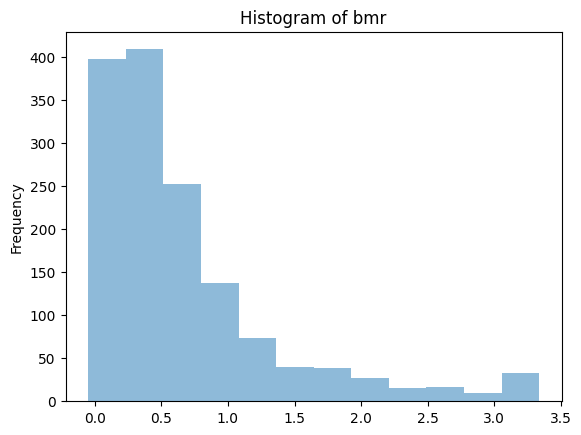

In [54]:
hist=dataproof['bmr'].plot.hist(bins=12,alpha=0.5,title="Histogram of bmr")
dataproof['bmr'].describe()